In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\alfan\anaconda3\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from scipy.stats import norm
from math import sqrt
%matplotlib inline

In [3]:
# Loading the dataset of tesla stock price

In [4]:
data=pd.read_csv(r"C:\Users\alfan\Downloads\stock price.csv",index_col=['Date'], parse_dates=['Date']) 

In [5]:
data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
...,...,...,...,...,...,...
2017-03-13,244.820007,246.850006,242.779999,246.169998,3010700,246.169998
2017-03-14,246.110001,258.119995,246.020004,258.000000,7575500,258.000000
2017-03-15,257.000000,261.000000,254.270004,255.729996,4816600,255.729996


In [6]:
data.shape

(1692, 6)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1692 entries, 2010-06-29 to 2017-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1692 non-null   float64
 1   High       1692 non-null   float64
 2   Low        1692 non-null   float64
 3   Close      1692 non-null   float64
 4   Volume     1692 non-null   int64  
 5   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 92.5 KB


In [8]:
data.describe

<bound method NDFrame.describe of                   Open        High         Low       Close    Volume  \
Date                                                                   
2010-06-29   19.000000   25.000000   17.540001   23.889999  18766300   
2010-06-30   25.790001   30.420000   23.299999   23.830000  17187100   
2010-07-01   25.000000   25.920000   20.270000   21.959999   8218800   
2010-07-02   23.000000   23.100000   18.709999   19.200001   5139800   
2010-07-06   20.000000   20.000000   15.830000   16.110001   6866900   
...                ...         ...         ...         ...       ...   
2017-03-13  244.820007  246.850006  242.779999  246.169998   3010700   
2017-03-14  246.110001  258.119995  246.020004  258.000000   7575500   
2017-03-15  257.000000  261.000000  254.270004  255.729996   4816600   
2017-03-16  262.399994  265.750000  259.059998  262.049988   7100400   
2017-03-17  264.000000  265.329987  261.200012  261.500000   6475900   

             Adj Close  
Date

In [9]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [10]:
data1 = data['Close']
data1

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2017-03-13    246.169998
2017-03-14    258.000000
2017-03-15    255.729996
2017-03-16    262.049988
2017-03-17    261.500000
Name: Close, Length: 1692, dtype: float64

In [11]:
# Plotting the close data

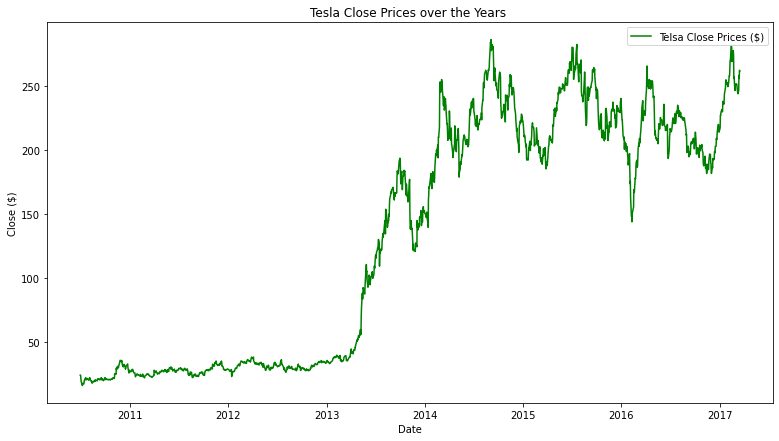

In [12]:
plt.figure(figsize=(13, 7))
plt.plot(data1.index, data1, label='Telsa Close Prices ($)', color='green')
plt.title('Tesla Close Prices over the Years ')
plt.xlabel('Date')
plt.ylabel('Close ($)')
plt.legend()
plt.show()

In [13]:
data1.mean()

132.42865848581542

In [14]:
data1.std()

94.31318671731363

In [15]:
rolling_mean = data1.rolling(window=6).mean()

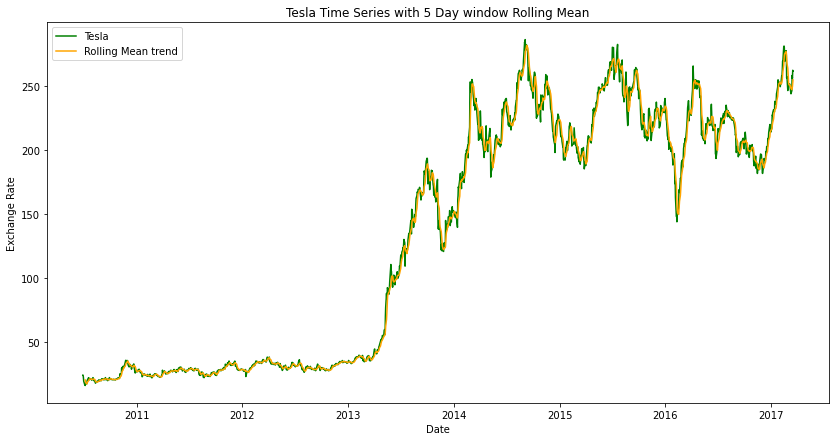

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(data1.index, data1, label='Tesla', color='green')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean trend', color='orange')
plt.title('Tesla Time Series with 5 Day window Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [17]:
# Time Series with Keras

In [18]:
data12 = data[['Close']]
data12

,Close
Date,
2010-06-29,23.889999
2010-06-30,23.830000
2010-07-01,21.959999
2010-07-02,19.200001
2010-07-06,16.110001
...,...
2017-03-13,246.169998
2017-03-14,258.000000
2017-03-15,255.729996


In [19]:
pip install tensorflow


In [20]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_squared_error


In [21]:
# Normalize the data

In [22]:
scaler = MinMaxScaler()
data12= scaler.fit_transform(data12)


In [23]:
# Splitting the data into training and testing set

In [24]:
train_size = int(len(data12) * 0.80)
test_size = len(data12) - train_size
train_data, test_data = data12[0:train_size], data12[train_size:len(data12)]


In [25]:
# Create sequences for time series forecasting 

In [26]:
def create_sequences(data12, look_back):
    X, y = [], []
    for i in range(len(data12) - look_back):
        X.append(data12[i:(i+look_back), 0])
        y.append(data12[i + look_back, 0])
    return np.array(X), np.array(y)

In [27]:
look_back = 10  # Number of previous time steps to use for prediction
X_train, y_train = create_sequences(train_data, look_back)
X_test, y_test = create_sequences(test_data, look_back)

In [28]:
# Create and compile the LSTM model

In [29]:
model = Sequential()
model.add(LSTM(units=64, activation='relu', return_sequences=True, input_shape=(look_back, 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, activation='relu'))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')


In [30]:
# Train the model

In [31]:
model.fit(X_train, y_train, epochs=2000, batch_size=32)
  





Epoch 1/2000
42/42 [==============================] - 8s 23ms/step - loss: 0.0717
Epoch 2/2000
42/42 [==============================] - 1s 23ms/step - loss: 0.0024
Epoch 3/2000
42/42 [==============================] - 1s 23ms/step - loss: 0.0017
Epoch 4/2000
42/42 [==============================] - 1s 22ms/step - loss: 0.0015
Epoch 5/2000
42/42 [==============================] - 1s 22ms/step - loss: 0.0015
Epoch 6/2000
42/42 [==============================] - 1s 23ms/step - loss: 0.0014
Epoch 7/2000
42/42 [==============================] - 1s 23ms/step - loss: 0.0013
Epoch 8/2000
42/42 [==============================] - 1s 23ms/step - loss: 0.0013
Epoch 9/2000
42/42 [==============================] - 1s 23ms/step - loss: 0.0013
Epoch 10/2000
42/42 [==============================] - 1s 23ms/step - loss: 0.0012
Epoch 11/2000
42/42 [==============================] - 1s 23ms/step - loss: 0.0012
Epoch 12/2000
42/42 [==============================] - 1s 23ms/step - loss: 0.0012
Epoch 13/2000

In [35]:
# Make Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# Inverse transform the predictions to the original scale
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE (Root Mean Squared Error) to evaluate the model
train_score = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_score = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f"Train RMSE: {train_score:.4f}")
print(f"Test RMSE: {test_score:.4f}")


11/11 [==============================] - 0s 11ms/step
Train RMSE: 10.5993
Test RMSE: 16.3220


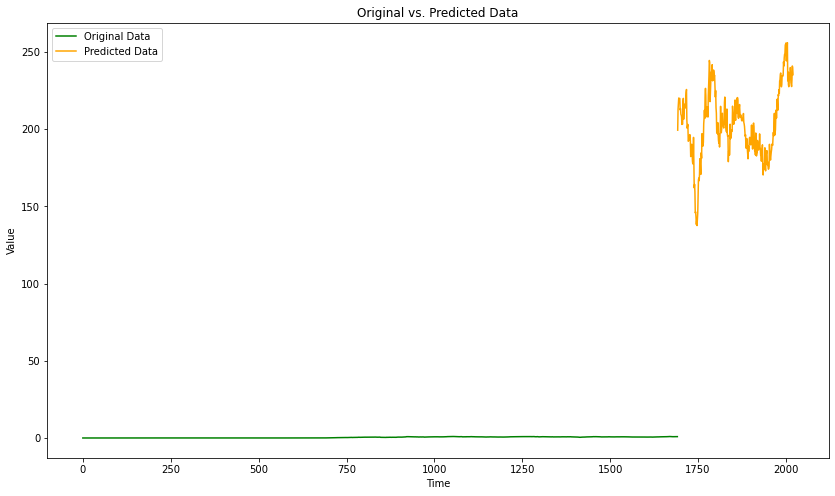

In [37]:
plt.figure(figsize=(14, 8))
plt.plot(np.arange(len(data12)), data12, label='Original Data', color='green')
plt.plot(np.arange(len(data12), len(data12) + len(test_predict)), test_predict, label='Predicted Data', color='orange')
plt.legend()
plt.title('Original vs. Predicted Data')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [38]:
#Predicting future prices

In [39]:
data_preds= data['Close']
data_preds

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2017-03-13    246.169998
2017-03-14    258.000000
2017-03-15    255.729996
2017-03-16    262.049988
2017-03-17    261.500000
Name: Close, Length: 1692, dtype: float64

In [40]:
log_returns_data = np.log(1+ data_preds.pct_change())
log_returns_data.tail()

Date
2017-03-13    0.010125
2017-03-14    0.046937
2017-03-15   -0.008837
2017-03-16    0.024413
2017-03-17   -0.002101
Name: Close, dtype: float64

In [41]:
u = log_returns_data.mean()
var = log_returns_data.var()
print(u)
print(var)

0.0014151238107781088
0.0010697923770593978


In [42]:
stdev = log_returns_data.std()
stdev

0.03270768070437581

In [43]:
drift = u -(0.5 * var) # u = average log return - half variance
drift

0.0008802276222484099

In [44]:
np.array(drift)

array(0.00088023)

In [46]:
norm.ppf(0.75)

0.6744897501960817

In [50]:
x = np.random.rand(10,2)
x

array([[0.10276905, 0.20939957],
       [0.23099907, 0.41710788],
       [0.5825871 , 0.32301867],
       [0.18138149, 0.05628915],
       [0.29747855, 0.5772193 ],
       [0.89943261, 0.47126349],
       [0.83930468, 0.1723773 ],
       [0.78494232, 0.06390903],
       [0.29771722, 0.86292758],
       [0.2933107 , 0.74300787]])

In [51]:
norm.ppf(x)

array([[-1.26593011, -0.80850639],
       [-0.73556062, -0.20929781],
       [ 0.20851636, -0.45927411],
       [-0.9101129 , -1.58671016],
       [-0.53166636,  0.19478484],
       [ 1.27832524, -0.07209416],
       [ 0.99160419, -0.94481251],
       [ 0.78899428, -1.52276283],
       [-0.53097739,  1.09356722],
       [-0.54373855,  0.65264642]])

In [52]:
t_intervals = 365 # t-intervals = time intervals. interested in forecast stock prices for next 1000 days
iterations = 5 # asking computer to produce 10 series of future stock price predicitons

In [53]:
daily_returns = np.exp(drift + stdev * norm.ppf(np.random.rand(t_intervals, iterations)))
daily_returns

array([[0.98330951, 1.03618373, 1.00530055, 0.99943035, 0.98224227],
       [1.04430508, 1.02331331, 0.9649356 , 0.96827156, 0.94919706],
       [0.99796407, 1.01612201, 0.98054973, 1.05904626, 1.00160897],
       ...,
       [0.9806279 , 0.96067975, 0.98132394, 1.04238836, 0.9757148 ],
       [0.99846237, 1.05581268, 1.0039173 , 0.95517824, 1.02726923],
       [1.04674913, 0.94511805, 1.01094742, 0.98686937, 1.00343761]])

In [55]:
ab= data_preds.iloc[-1]
ab

261.5

In [56]:
prices_list= np.zeros_like(daily_returns) #zeros_like- Return an array of zeros with the same shape and type as a given array
prices_list

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [57]:
prices_list[0] = ab # 1st row of prices_list must equal S0. as S0 will be the inital price for each of the iterations intended to be generated
prices_list

array([[261.5, 261.5, 261.5, 261.5, 261.5],
       [  0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ],
       ...,
       [  0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ],
       [  0. ,   0. ,   0. ,   0. ,   0. ]])

In [58]:
for t  in range(1, t_intervals): # this loop starts at day 1 and ends of day 1000
    prices_list[t] = prices_list[t-1] * daily_returns[t]

prices_list

array([[261.5       , 261.5       , 261.5       , 261.5       ,
        261.5       ],
       [273.08577784, 267.59643148, 252.33065944, 253.20301385,
        248.21503243],
       [272.52979384, 271.91062415, 247.42275966, 268.1537045 ,
        248.61440223],
       ...,
       [253.12491537, 233.8243509 , 165.96146887, 584.92687871,
        741.17125599],
       [252.73570176, 246.87471569, 166.61158918, 558.70942885,
        761.382425  ],
       [264.55087626, 233.32574878, 168.43555626, 551.37322365,
        763.99975963]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


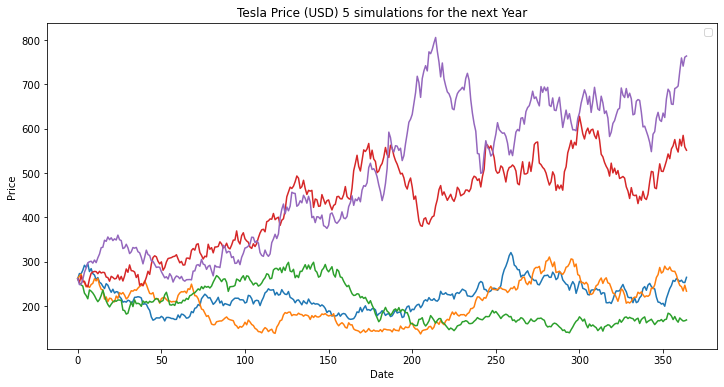

In [59]:
plt.figure(figsize=(12,6))
plt.plot(prices_list)
plt.title('Tesla Price (USD) 5 simulations for the next Year')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()